# Part 3

This part explores potential reuse related to Carl von Linné's work.

- (How) has Linné been influenced by other botanists?
- (How) have Linnés drawings been reused by others?

In [ ]:
## Preparations

In [4]:
# packages
import numpy as np
import pandas as pd

from utils import *


In [5]:
# data

path= "C:/Users/telmi/Documents/dhh23/EarlyModernReuse/early_modern_data-main/"

# C:\Users\telmi\Documents\dhh23\reuseportfolio
meta = path + "metadata.csv"
clip= path + "clip_classification.csv"

meta = pd.read_csv(meta, dtype={"page_id":str, "ecco_id":str})
clip = pd.read_csv(clip)

#print(dpath)
#df= pd.read_csv(dpath)

# rename columns
clip=clip.rename(columns={"Image": "original_image"})

# column for page id to merge with metadata
clip["page_id"] = clip["original_image"].apply(lambda x: x.split("_")[0])

# select only these columns
cols= ["page_id","ecco_id","work_id", "ecco_full_title","gatherings","publication_year","publication_decade","document_type","authors","sub_category"]

meta = meta[cols]
data=meta.merge(clip)

# filter by score > 50 for the botany classification
data=data[data["Score"]>50]
data=data.fillna({"authors":"unk", "gatherings":"unk"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129042 entries, 0 to 154339
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   page_id             129042 non-null  object 
 1   ecco_id             129042 non-null  object 
 2   work_id             129039 non-null  object 
 3   ecco_full_title     129042 non-null  object 
 4   gatherings          129042 non-null  object 
 5   publication_year    126641 non-null  float64
 6   publication_decade  126641 non-null  float64
 7   document_type       123166 non-null  object 
 8   authors             129042 non-null  object 
 9   sub_category        118938 non-null  object 
 10  original_image      129042 non-null  object 
 11  Category            129042 non-null  object 
 12  Score               129042 non-null  float64
 13  Second_choice       129042 non-null  object 
 14  2ndScore            129042 non-null  float64
dtypes: float64(4), object(11)
memory usage:

In [6]:
# pickled files, similarity

import pickle
from PIL import Image

similarNames_path = "C:/Users/telmi/Documents/dhh23/image-similarity-detection/similar_names.pkl"
similarValues_path = "C:/Users/telmi/Documents/dhh23/image-similarity-detection/similar_values.pkl"

# open a file where you stored the pickled data
file = open(similarNames_path, 'rb')
simNames = pickle.load(file)
file.close()

file = open(similarValues_path, 'rb')
simValues = pickle.load(file)
file.close()

In [7]:
# make a new dataframe where the earlier year is always work_id, and the reuse work_id_2

def sortByTime(data):
    df2 = pd.DataFrame()

    col_1= ["original_image", 'page_id', 'ecco_id',
           'work_id', 'ecco_full_title', 'gatherings', 'publication_year',
           'publication_decade', 'document_type', 'authors', 'sub_category']
    col_2=["similar_image",'page_id_2', 'ecco_id_2', 'work_id_2', 'ecco_full_title_2',
           'gatherings_2', 'publication_year_2', 'publication_decade_2',
           'document_type_2', 'authors_2', 'sub_category_2']
    # dictionary where the columns are mapped
    col_dict1= {c1:c2 for c1,c2 in zip(col_1,col_2)}
    col_dict2={c2:c1 for c1,c2 in zip(col_1,col_2)}
    col_dict = {**col_dict1,**col_dict2}


    # loop the df
    for i in range(len(data)):
        row = data.iloc[i]
        y1 = row["publication_year"]
        y2 = row["publication_year_2"]
        temp=pd.DataFrame(row).T 
        
        # make the earlier picture the source picture
        if y1> y2: 
            # rename columns if the reuse is spotted the wrong way
            temp=temp.rename(columns=col_dict)
            df2 = pd.concat([df2,temp])
        else:
            df2 = pd.concat([df2,temp])
            
    return df2

## Linné

In [8]:
# linne as author
print(data[data["authors"].str.contains("Linn")]["authors"].unique())

print("\n")
print("Publications by Linné(s):")
print(data[data["authors"].str.contains("Linn")][["work_id","publication_year"]].drop_duplicates().sort_values("publication_year"))
print("\n")
print("Different pages per work id:")
print(data[data["authors"].str.contains("Linn")].groupby("work_id")["page_id"].nunique().sort_values().reset_index())

['Linné, Carl von, 1707-1778.' 'Linné, Carl von, 1741-1783.']


Publications by Linné(s):
                                                 work_id  publication_year
7216   6871-an introduction to botany containing expl...            1760.0
24350  6871-an introduction to botany containing expl...            1776.0
19775                         70856-systema vegetabilium            1782.0
47494  6871-an introduction to botany containing expl...            1788.0
1862   61383-caroli linnaei flora lapponica exhibens ...            1792.0
1914   6871-an introduction to botany containing expl...            1796.0


Different pages per work id:
                                             work_id  page_id
0  61383-caroli linnaei flora lapponica exhibens ...       11
1                         70856-systema vegetabilium       11
2  6871-an introduction to botany containing expl...       44


In [9]:
# Linné in the publication name

# linne as author
print(data[data["ecco_full_title"].str.contains("Linn")]["authors"].unique())

print("\n")
print("Publications by Linné(s):")
print(data[data["ecco_full_title"].str.contains("Linn")][["work_id","publication_year","authors"]].drop_duplicates().sort_values("publication_year"))
print("\n")
print("Different pages per work id:")
print(data[data["ecco_full_title"].str.contains("Linn")].groupby("work_id")["page_id"].nunique().sort_values().reset_index())

['Withering, William, 1741-1799.' 'Society of Gentlemen.'
 'Miller, Philip, 1691-1771.' 'unk' 'Hill, John, 1714?-1775.'
 'Donovan, E. (Edward), 1768-1837.' 'Hatton, Edward, 1664?-'
 'Brookes, R. (Richard), active 1721-1763.' 'Miller, John, 1715-1790?.'
 'Barbut, James.' 'Reede tot Drakestein, Hendrik van, 1637?-1691.'
 'Wilkes, Benjamin, -1749.' 'Martyn, Thomas, 1735-1825.'
 'Lightfoot, John, 1735-1788.' 'Linné, Carl von, 1707-1778.'
 'Mavor, William Fordyce, 1758-1837.' 'Milne, Colin, 1743 or 1744-1815.'
 'Lee, James, 1715-1795.' 'Brailsford, Edward, -1856.'
 'Shaw, George, 1751-1813.' 'Abercrombie, John, 1726-1806.'
 'Ellis, John, 1710?-1776.' 'Linné, Carl von, 1741-1783.'
 'Wheeler, James, -1763.' 'Pulteney, Richard, 1730-1801.'
 'Jacquin, Joseph Franz, Freiherr von, 1766-1839.'
 'Blad, Anders, 1748-1834.' 'Born, Ignaz, Edler von, 1742-17901.'
 'Abbot, Charles, 1761-1817.' 'Walter, Thomas, 1740?-1788.'
 'Jameson, Robert, 1774-1854.']


Publications by Linné(s):
                    

In [10]:
# see all different works from Linné

author='Linné, Carl von, 1707-1778.' 
linnes=['Linné, Carl von, 1707-1778.', 'Linné, Carl von, 1741-1783.']
linne = data[data["authors"].isin(linnes)]
linne.sort_values("publication_year").drop_duplicates(["work_id"])[["publication_year","work_id"]]

,publication_year,work_id
38185,1760.0,6871-an introduction to botany containing expl...
148386,1782.0,70856-systema vegetabilium
100917,1792.0,61383-caroli linnaei flora lapponica exhibens ...


In [11]:
# how many potential images in the earliest one?
id_list= list(linne.drop_duplicates(["work_id"])["work_id"])
id_list
lp_meta=data[data["work_id"].isin(id_list)]

lp_meta.groupby("work_id")["page_id"].nunique()

work_id
61383-caroli linnaei flora lapponica exhibens plantas per lapponiam crescentes secundum systema sexuale collectas in itinere impensis soc    11
6871-an introduction to botany containing explanation of theory of that science extracted from works of                                      44
70856-systema vegetabilium                                                                                                                   11
Name: page_id, dtype: int64

In [12]:
# search from the pickled files
# add the file names to retrieve
#lp_meta=lp_meta.merge(clip[["original_image","page_id"]])

In [13]:
# Pluketipluketipluk
w_id="6871-an introduction to botany containing explanation of theory of that science extracted from works of"
botany_intro = lp_meta[lp_meta["work_id"]==w_id]

linne_pic_ids = list(botany_intro["original_image"].unique())

In [14]:
# Search for similar images

def get_similar_images(image, sim_names, simVals, cutoff=0.85):
    cutoff_value = cutoff
    filtered = simVals[simVals > cutoff_value]
    if image in set(sim_names.index):
        imgs = list(sim_names.loc[image, :])
        vals = list(filtered.loc[image, :])
        if image in imgs:
            assert_almost_equal(max(vals), 1, decimal = 5)
            imgs.remove(image)
            vals.remove(max(vals))
        return imgs, vals
    else:
        print("'{}' Unknown image".format(image))

results = list()
no_matches=[]

# Get similar images
for image in linne_pic_ids:
    if image in simValues.index:
        imgs, vals = get_similar_images(image, simNames, simValues)
        for x in range(0, len(imgs)):
            if pd.isna(vals[x]):
                continue
            Dict = {"original_image" : image, "similar_image" : imgs[x], "similarity_score" : vals[x]}
            results.append(Dict)
    else:
        no_matches.append(image)
        

#write_image_data_to_csv(results)
#print("Similarities computed")

In [15]:
def getSim2df(pic_id_list, simNames, simValues, cutoff=0.85, **kwargs):
    no_matches=[]
    results = list()
    for image in pic_id_list:
        p_id=image.split("_")[0]
        if image in simValues.index:
            imgs, vals = get_similar_images(image, simNames, simValues, cutoff)
            for x in range(0, len(imgs)):
                if pd.isna(vals[x]):
                    continue
                Dict = {"original_image" : image, "similar_image" : imgs[x], "similarity_score" : vals[x], "page_id":p_id, "page_id_2":imgs[x].split("_")[0]}
                results.append(Dict)
        else:
            no_matches.append(image)
            
    # save into df
    reuse = pd.DataFrame(results)
    #if meta:
    #    reuse=reuse.merge(meta)
    #    reuse=reuse.merge(meta, left_on="page_id_2", right_on="page_id", suffixes=["","_2"])
    return(reuse, no_matches)

In [16]:
linne_reuse, nomatch = getSim2df(linne_pic_ids, simNames, simValues, cutoff=0.88)

In [17]:
# add metadata
linne_reuse=linne_reuse.merge(meta)
linne_reuse=linne_reuse.merge(meta,left_on="page_id_2",right_on="page_id", suffixes=["","_2"])

In [18]:
linne_reuse

,original_image,similar_image,similarity_score,page_id,page_id_2,ecco_id,work_id,ecco_full_title,gatherings,publication_year,...,page_id_2,ecco_id_2,work_id_2,ecco_full_title_2,gatherings_2,publication_year_2,publication_decade_2,document_type_2,authors_2,sub_category_2
0,129430030003610_0.png,060190100003700_0.png,0.937680,129430030003610,060190100003700,1294300300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1760.0,...,060190100003700,0601901000,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1796.0,1790.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
1,054890030003930_0.png,060190100003700_0.png,0.899277,054890030003930,060190100003700,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,...,060190100003700,0601901000,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1796.0,1790.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
2,064750020003990_0.png,060190100003700_0.png,0.890763,064750020003990,060190100003700,0647500200,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1788.0,...,060190100003700,0601901000,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1796.0,1790.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
3,129430030003610_0.png,054890030003930_0.png,0.898718,129430030003610,054890030003930,1294300300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1760.0,...,054890030003930,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,1770.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
4,060190100003700_0.png,054890030003930_0.png,0.899277,060190100003700,054890030003930,0601901000,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1796.0,...,054890030003930,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,1770.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,054890030003890_2.png,129430030003570_1.png,0.900325,054890030003890,129430030003570,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,...,129430030003570,1294300300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1760.0,1760.0,Book,"Linné, Carl von, 1707-1778.",scientificimprovementnaturalhistory
103,054890030003890_3.png,031780010004690_3.png,0.895067,054890030003890,031780010004690,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,...,031780010004690,0317800100,52255-universal gardener and botanist or gener...,"The universal gardener and botanist: or, a gen...",4to,1797.0,1790.0,Book,"Abercrombie, John, 1726-1806.",scientificimprovementagricultureanimalhusbandry
104,054890030003890_3.png,101100020000500_1.png,0.888328,054890030003890,101100020000500,0548900300,6871-an introduction to botany containing expl...,An introduction to botany. Containing an expla...,8vo,1776.0,...,101100020000500,1011000200,782-gardeners kalendar directing what works ar...,The gardeners kalendar; directing the necessar...,12mo,1775.0,1770.0,Book,"Miller, Philip, 1691-1771.",scientificimprovementagricultureanimalhusbandry
105,054890030003890_3.png,053900040002380_2.png,0.886057,054890030003890,053900040002380,0548900300,6871-an introduction to botany containing expl...,An introduction to 

In [19]:
# order so that the earliest is always the source:
#linne_reuse_ordered=sortByTime(linne_reuse.drop_duplicates())

df2 = pd.DataFrame()

col_1= ["original_image", 'page_id', 'ecco_id',
       'work_id', 'ecco_full_title', 'gatherings', 'publication_year',
       'publication_decade', 'document_type', 'authors', 'sub_category']
col_2=["similar_image",'page_id_2', 'ecco_id_2', 'work_id_2', 'ecco_full_title_2',
       'gatherings_2', 'publication_year_2', 'publication_decade_2',
       'document_type_2', 'authors_2', 'sub_category_2']
# dictionary where the columns are mapped
col_dict1= {c1:c2 for c1,c2 in zip(col_1,col_2)}
col_dict2={c2:c1 for c1,c2 in zip(col_1,col_2)}
col_dict = {**col_dict1,**col_dict2}


# loop the df
for i in range(len(linne_reuse)):
    row = linne_reuse.iloc[i]
    
    y1 = row["publication_year"]
    y2 = row["publication_year_2"]
    #print(y1,y2)
    temp=pd.DataFrame(row).T

    # make the earlier picture the source picture
    if y1> y2: 
        # rename columns if the reuse is spotted the wrong way
        
        #temp=temp.rename(columns=col_dict,axis=0)
        temp=temp[['original_image', 'similar_image', 'similarity_score', 'page_id',
       'page_id_2', 'ecco_id', 'work_id', 'ecco_full_title', 'gatherings',
       'publication_year', 'publication_decade', 'document_type', 'authors',
       'sub_category', 'page_id_2', 'ecco_id_2', 'work_id_2',
       'ecco_full_title_2', 'gatherings_2', 'publication_year_2',
       'publication_decade_2', 'document_type_2', 'authors_2',
       'sub_category_2']]
        df2 = pd.concat([df2,temp]).reset_index(drop=True)
        #df2
    else:
        temp=temp[['original_image', 'similar_image', 'similarity_score', 'page_id',
       'page_id_2', 'ecco_id', 'work_id', 'ecco_full_title', 'gatherings',
       'publication_year', 'publication_decade', 'document_type', 'authors',
       'sub_category', 'page_id_2', 'ecco_id_2', 'work_id_2',
       'ecco_full_title_2', 'gatherings_2', 'publication_year_2',
       'publication_decade_2', 'document_type_2', 'authors_2',
       'sub_category_2']]
        df2 = pd.concat([df2,temp]).reset_index(drop=True)

#return df2

In [20]:
df2.authors_2.unique()
reuse_others = df2[df2["authors_2"]!='Linné, Carl von, 1707-1778.']
reuse_by_linne = df2[df2["authors"]!='Linné, Carl von, 1707-1778.']



Threshold: 0.88
Plotting similar images for 060190100003660_2.png


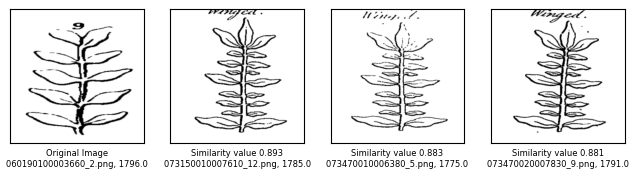

Plotting similar images for 054890030003890_3.png


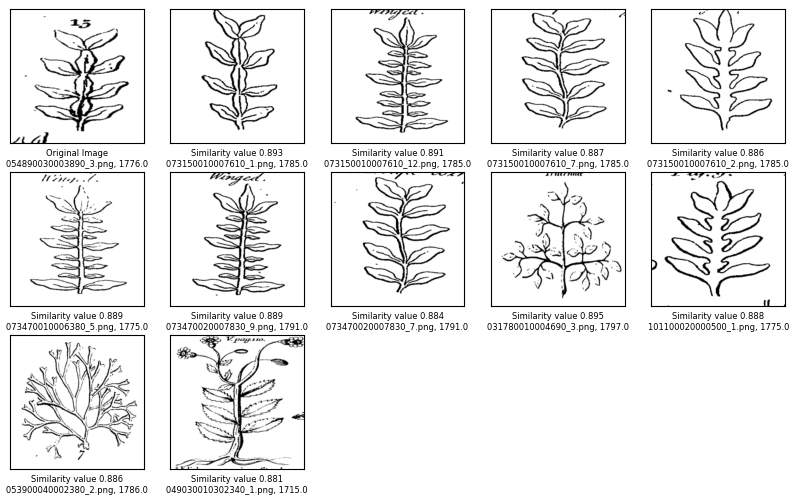

Plotting similar images for 060190100003660_2.png


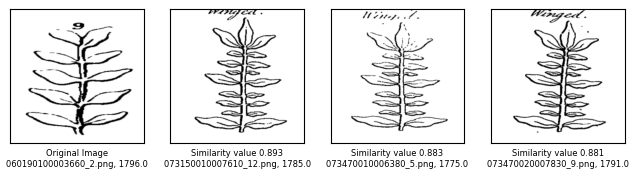

Plotting similar images for 054890030003890_3.png


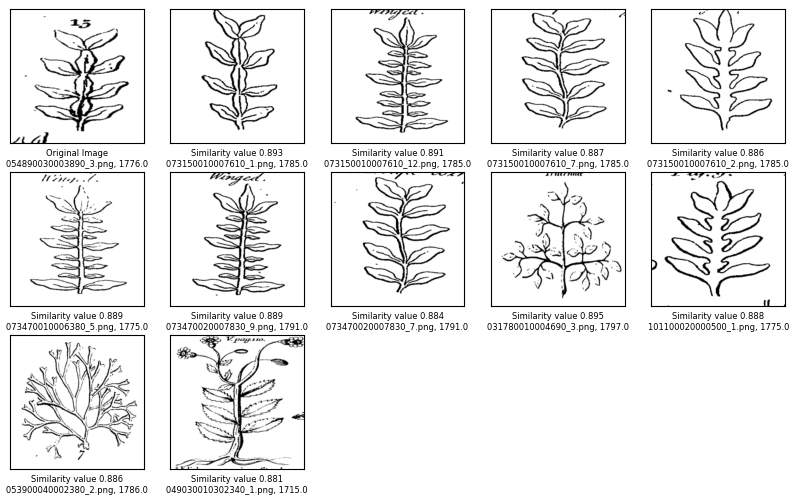

Threshold: 0.9
Plotting similar images for 054890030003890_3.png


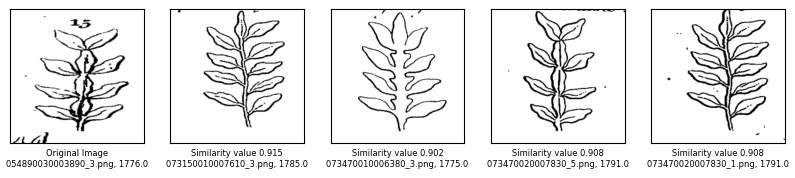

Plotting similar images for 129430030003530_0.png


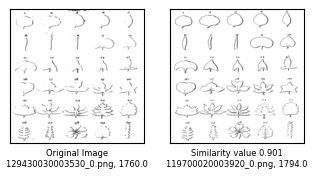

Plotting similar images for 064750020003930_0.png


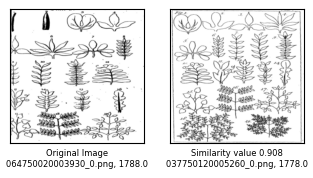

Plotting similar images for 054890030003890_2.png


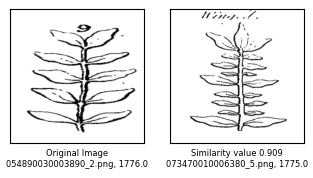

Threshold: 0.92
Plotting similar images for 054890030003810_0.png


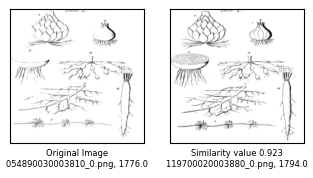

Plotting similar images for 054890030003930_0.png


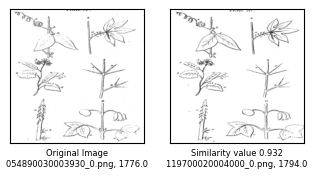

Plotting similar images for 064750020003840_0.png


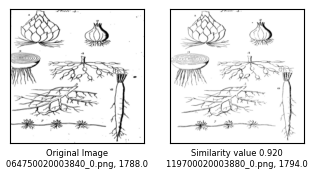

Plotting similar images for 060190100003700_0.png


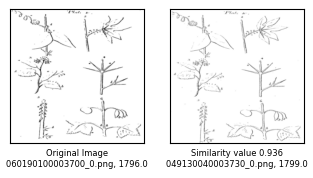

Threshold: 0.94
Plotting similar images for 064750020003880_0.png


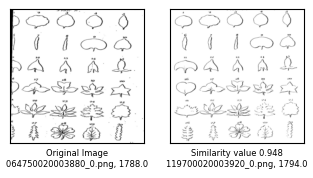

Plotting similar images for 060190100003620_0.png


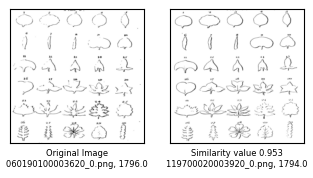

Plotting similar images for 054890030003890_0.png


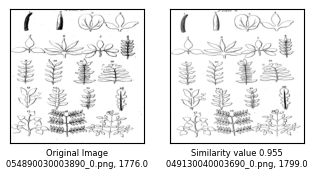

Plotting similar images for 064750020003930_0.png


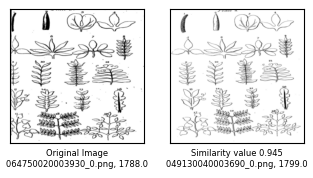

Threshold: 0.96
3 3
Plotting similar images for 054890030003790_0.png


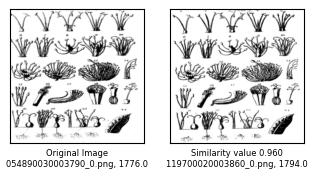

Plotting similar images for 054890030003910_0.png


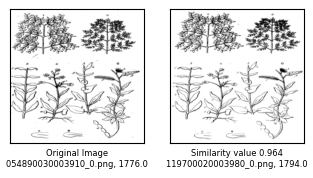

Plotting similar images for 060190100003620_0.png


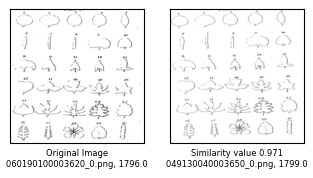

In [21]:

# plot some images:

inputDir="C:/Users/telmi/Documents/dhh23/image-similarity-detection/res"

# plot similar images for different thresholds to see how well they match

for ts in [0.88,0.9,0.92,0.94, 0.96]:
    # filter data
    temp = reuse_others.drop_duplicates(["original_image","similar_image"])[(reuse_others["similarity_score"] >= ts) & (reuse_others["similarity_score"] < (ts+0.02))]
    print("Threshold:", ts) 
    
    try:
        for ix in temp.sample(4)["original_image"]:
            print("Plotting similar images for" , ix)
            plotImages(ix,inputDir,temp)
    except:
        print(len(temp), temp["original_image"].nunique())
        for ix in temp.drop_duplicates(["original_image"])["original_image"]:
            print("Plotting similar images for" , ix)
            plotImages(ix,inputDir,temp)
        #print("No images within this similarity range")

# 054890030003790_0.png

In [24]:
# Some case examinations

interesting_ids=["064750020003930_0.png","054890030003890_3.png","060190100003620_0.png","060190100003670_0.png"]

In [29]:
# case 1
image=interesting_ids[0]


case1,nomatches=getSim2df([image], simNames,simValues,cutoff=0.88)
case1=case1.merge(meta)
case1=case1.merge(meta,left_on="page_id_2",right_on="page_id", suffixes=["","_2"])

In [30]:
# print metadata
pd.set_option('max_colwidth', 250)
print(str("https://a3s.fi/dhh23-em-illu/"+case1["original_image"].iloc[0]))
case1[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]].to_csv("../cas1.csv", sep="\t")
case1[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]]#.to_csv("../cas1.csv", sep="\t")


https://a3s.fi/dhh23-em-illu/064750020003930_0.png


,ecco_full_title,publication_year,gatherings,authors,ecco_full_title_2,publication_year_2,authors_2,gatherings_2
0,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,"Linné, Carl von, 1707-1778.",8vo
1,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,8vo,"Linné, Carl von, 1707-1778.",An introduction to botany: containing an explanation of the theory of that science; from the works of Linnæus. Together with an appendix; a glossary; and an English explanation of the Latin botanic terms. Illustrated by copperplates. By James Lee...,1799.0,"Lee, James, 1715-1795.",8vo
2,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,"Linné, Carl von, 1707-1778.",8vo
3,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,8vo,"Linné, Carl von, 1707-1778.","A botanical dictionary: or elements of systematic and philosophical botany. Containing Descriptions of the Parts of Plants-an Explanation of the scientific Terms used by Morison, Ray, Tournefort, Linnaeus, and other eminent Botanists-a brief Anal...",1778.0,"Milne, Colin, 1743 or 1744-1815.",8vo
4,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,8vo,"Linné, Carl von, 1707-1778.","A system of vegetables, according to their classes genera orders species with their characters and differences. In two volumes. Translated from the thirteenth edition (as published by Dr. Murray) of the Systema vegetabilium of the late Professor ...",1782.0,"Linné, Carl von, 1741-1783.",8vo


In [33]:
meta[meta["ecco_full_title"].str.contains("A system of vegetables,")].drop_duplicates("publication_year")

,page_id,ecco_id,work_id,ecco_full_title,gatherings,publication_year,publication_decade,document_type,authors,sub_category
12810,116870010104900,1168700101,70856-systema vegetabilium,"A system of vegetables, according to their classes genera orders species with their characters and differences. In two volumes. Translated from the thirteenth edition (as published by Dr. Murray) of the Systema vegetabilium of the late Professor ...",8vo,1782.0,1780.0,Book,"Linné, Carl von, 1741-1783.",scientificimprovementnaturalhistory


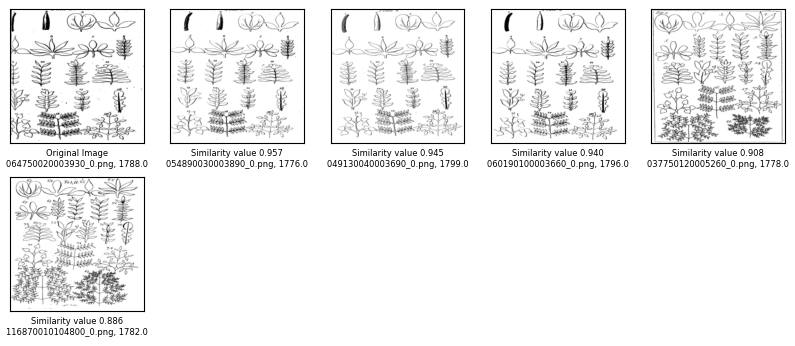

['Linné, Carl von, 1707-1778.'] [1788.]
Reused by Linné, Carl von, 1707-1778. 1776.0
Reused by Lee, James, 1715-1795. 1799.0
Reused by Linné, Carl von, 1707-1778. 1796.0
Reused by Milne, Colin, 1743 or 1744-1815. 1778.0
Reused by Linné, Carl von, 1741-1783. 1782.0


In [31]:
# plot case 1

plotImages(interesting_ids[0],inputDir,case1)
print(case1["authors"].unique(),case1["publication_year"].unique())
for i,r in case1.iterrows():
    print("Reused by", r["authors_2"],r["publication_year_2"])

In [37]:
# case 2

image=interesting_ids[1]


case2,nomatches=getSim2df([image], simNames,simValues, cutoff=0.88)
case2=case2.merge(meta.sort_values("publication_year"))
case2=case2.merge(meta.sort_values("publication_year"),left_on="page_id_2",right_on="page_id", suffixes=["","_2"])

In [38]:
# print metadata
pd.set_option('max_colwidth', 250)
print(str("https://a3s.fi/dhh23-em-illu/"+case2["original_image"].iloc[0]))
case2[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]].to_csv("../case2.csv", sep="\t")
case2[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]]#.to_csv("../cas1.csv", sep="\t")


https://a3s.fi/dhh23-em-illu/054890030003890_3.png


,ecco_full_title,publication_year,gatherings,authors,ecco_full_title_2,publication_year_2,authors_2,gatherings_2
0,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Pharmacy, &c. &c. &c. Each Article,...",1775.0,"Motherby, G. (George), 1732-1793.",2fo
1,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Pharmacy, &c. &c. &c. Each Article,...",1775.0,"Motherby, G. (George), 1732-1793.",2fo
2,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Pharmacy, &c. &c. &c. Each Article,...",1775.0,"Motherby, G. (George), 1732-1793.",2fo
3,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars. Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Chemistry, &c. &c. &c. Each Articl...",1785.0,"Motherby, G. (George), 1732-1793.",2fo
4,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars. Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Chemistry, &c. &c. &c. Each Articl...",1785.0,"Motherby, G. (George), 1732-1793.",2fo
5,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictionary; or, general repository of physic. Containing an explanation of the terms, and a description of the various particulars. Relating To Anatomy, Physiology, Physic, Surgery, Materia Medica, Chemistry, &c. &c. &c. Each Articl...",1785.0,"Motherby, G. (George), 1732-1793.",2fo
6,"An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,8vo,"Linné, Carl von, 1707-1778.","A new medical dictio

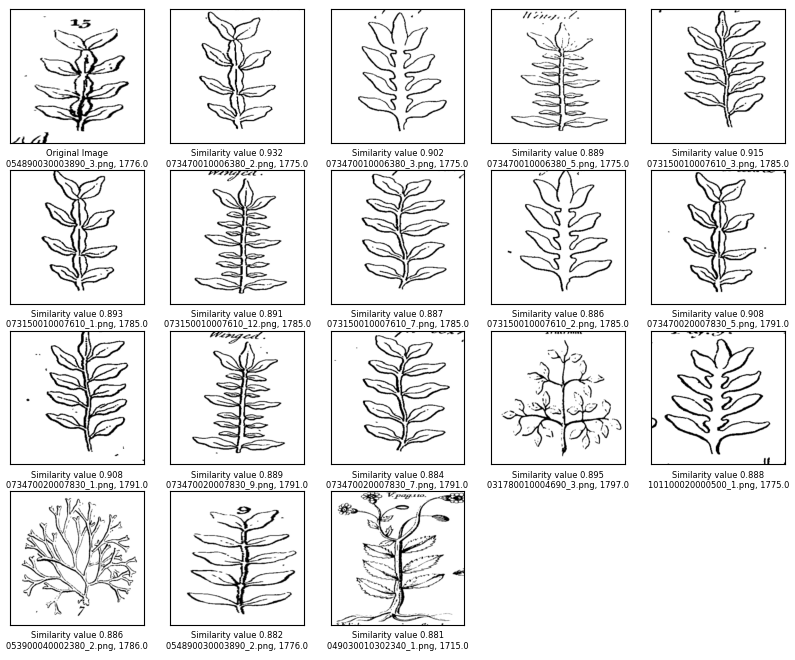

['Linné, Carl von, 1707-1778.'] [1776.]
Motherby, G. (George), 1732-1793. 1775.0 False
Motherby, G. (George), 1732-1793. 1775.0 False
Motherby, G. (George), 1732-1793. 1775.0 False
Motherby, G. (George), 1732-1793. 1785.0 True
Motherby, G. (George), 1732-1793. 1785.0 True
Motherby, G. (George), 1732-1793. 1785.0 True
Motherby, G. (George), 1732-1793. 1785.0 True
Motherby, G. (George), 1732-1793. 1785.0 True
Motherby, G. (George), 1732-1793. 1791.0 True
Motherby, G. (George), 1732-1793. 1791.0 True
Motherby, G. (George), 1732-1793. 1791.0 True
Motherby, G. (George), 1732-1793. 1791.0 True
Abercrombie, John, 1726-1806. 1797.0 True
Miller, Philip, 1691-1771. 1775.0 False
Ellis, John, 1710?-1776. 1786.0 True
Linné, Carl von, 1707-1778. 1776.0 False
Morison, Robert, 1620-1683. 1715.0 False


In [36]:
# plot case 1

plotImages(interesting_ids[1],inputDir,case2)

print(case2["authors"].unique(),case2["publication_year"].unique())
year=case2["publication_year"].unique()[0]

for i,r in case2.iterrows():
    print(r["authors_2"],r["publication_year_2"], r["publication_year_2"] > year)

In [26]:
# case 3

image=interesting_ids[2]


case3,nomatches=getSim2df([image], simNames,simValues, cutoff=0.88)
case3=case3.merge(meta)
case3=case3.merge(meta,left_on="page_id_2",right_on="page_id", suffixes=["","_2"])

In [50]:
# print metadata
pd.set_option('max_colwidth', 250)
print(str("https://a3s.fi/dhh23-em-illu/"+case3["original_image"].iloc[0]))
case3[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]].to_csv("../case3.csv", sep="\t")
case3[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]]#.to_csv("../cas1.csv", sep="\t")


https://a3s.fi/dhh23-em-illu/060190100003620_0.png


,ecco_full_title,publication_year,gatherings,authors,ecco_full_title_2,publication_year_2,authors_2,gatherings_2
0,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.",An introduction to botany: containing an explanation of the theory of that science; from the works of Linnæus. Together with an appendix; a glossary; and an English explanation of the Latin botanic terms. Illustrated by copperplates. By James Lee...,1799.0,"Lee, James, 1715-1795.",8vo
1,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,"Linné, Carl von, 1707-1778.",8vo
2,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An Introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper plates, two explanatory tables, an appendix, and glossary. The fifth edition, corrected, by James Lee,...",1794.0,"Lee, James, 1715-1795.",8vo
3,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,"Linné, Carl von, 1707-1778.",8vo
4,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science, and an interpretation of its technical terms. Extracted from the works of Dr. Linnæus, ... With twelve copper plates, and two explanatory tables. To which is adde...",1760.0,"Linné, Carl von, 1707-1778.",8vo


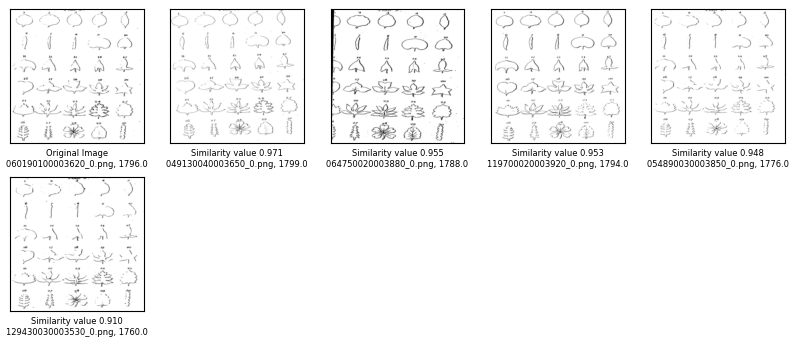

['Linné, Carl von, 1707-1778.'] [1796.]
Lee, James, 1715-1795. 1799.0 Pubished after: True
Linné, Carl von, 1707-1778. 1788.0 Pubished after: False
Lee, James, 1715-1795. 1794.0 Pubished after: False
Linné, Carl von, 1707-1778. 1776.0 Pubished after: False
Linné, Carl von, 1707-1778. 1760.0 Pubished after: False


In [27]:
# plot case 3

plotImages(interesting_ids[2],inputDir,case3)

print(case3["authors"].unique(),case3["publication_year"].unique())
year=case3["publication_year"].unique()[0]

for i,r in case3.iterrows():
    print(r["authors_2"],r["publication_year_2"], "Pubished after:", r["publication_year_2"] > year)

In [51]:


# case 4

image=interesting_ids[3]


case4,nomatches=getSim2df([image], simNames,simValues, cutoff=0.88)
case4=case4.merge(meta)
case4=case4.merge(meta,left_on="page_id_2",right_on="page_id", suffixes=["","_2"])

In [52]:
# print metadata
pd.set_option('max_colwidth', 250)
print(str("https://a3s.fi/dhh23-em-illu/"+case4["original_image"].iloc[0]))
case4[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]].to_csv("../case4.csv", sep="\t")
case4[["ecco_full_title","publication_year","gatherings", "authors","ecco_full_title_2","publication_year_2","authors_2","gatherings_2"]]#.to_csv("../cas1.csv", sep="\t")


https://a3s.fi/dhh23-em-illu/060190100003670_0.png


,ecco_full_title,publication_year,gatherings,authors,ecco_full_title_2,publication_year_2,authors_2,gatherings_2
0,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.",An introduction to botany: containing an explanation of the theory of that science; from the works of Linnæus. Together with an appendix; a glossary; and an English explanation of the Latin botanic terms. Illustrated by copperplates. By James Lee...,1799.0,"Lee, James, 1715-1795.",8vo
1,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An Introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper plates, two explanatory tables, an appendix, and glossary. The fifth edition, corrected, by James Lee,...",1794.0,"Lee, James, 1715-1795.",8vo
2,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science, and an interpretation of its technical terms. Extracted from the works of Dr. Linnæus, ... With twelve copper plates, and two explanatory tables. To which is adde...",1760.0,"Linné, Carl von, 1707-1778.",8vo
3,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix and glossary. The third edition, corrected, with large add...",1776.0,"Linné, Carl von, 1707-1778.",8vo
4,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","An introduction to botany. Containing an explanation of the theory of that science; extracted from the works of Dr. Linnæus; with twelve copper-plates, two explanatory tables, an appendix, and glossary. The fourth edition, corrected, with additio...",1788.0,"Linné, Carl von, 1707-1778.",8vo
5,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, per tabulas cognationis & affinitatis ex libro naturae observata & detecta. Auctore Roberto Morison Medico & Professore Botanico Regio, nec non Inclytae & Celeberrimae Univ...",1715.0,"Morison, Robert, 1620-1683.",2fo
6,"An introduction to botany. Containing an explanation of the theory of that science, extracted from the works of Linnæus; with an appendix; and glossary. The sixth edition, much improved and enlarged. By James Lee, ...",1796.0,8vo,"Linné, Carl von, 1707-1778.","Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, per tabulas cognationis & affinitatis ex libro naturae observata & detecta. Auctore Roberto Morison Medico & Professore Botanico Regio, nec non Inclytae & Celeberrimae Univ...",1715.0,"Morison, Robert, 1620-1683.",2

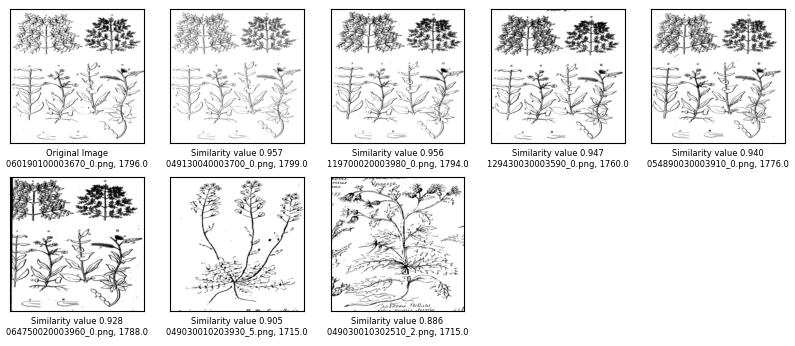

['Linné, Carl von, 1707-1778.'] [1796.]
Lee, James, 1715-1795. 1799.0 Pubished after: True
Lee, James, 1715-1795. 1794.0 Pubished after: False
Linné, Carl von, 1707-1778. 1760.0 Pubished after: False
Linné, Carl von, 1707-1778. 1776.0 Pubished after: False
Linné, Carl von, 1707-1778. 1788.0 Pubished after: False
Morison, Robert, 1620-1683. 1715.0 Pubished after: False
Morison, Robert, 1620-1683. 1715.0 Pubished after: False


In [29]:
# plot case 4

plotImages(interesting_ids[3],inputDir,case4)

print(case4["authors"].unique(),case4["publication_year"].unique())
year=case4["publication_year"].unique()[0]

for i,r in case4.iterrows():
    print(r["authors_2"],r["publication_year_2"], "Pubished after:",r["publication_year_2"] > year)